<a href="https://colab.research.google.com/github/FalaahArifKhan/RAI-summer-stability/blob/main/examples/Null_Scenarios_Example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# !git clone https://github.com/FalaahArifKhan/RAI-summer-stability.git

In [72]:
from IPython.display import clear_output
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment
    clear_output()

In [73]:
from sys import getsizeof
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from utils.data_loader import *
from utils.null_handler import *
from utils.EDA_utils import *

import warnings
warnings.filterwarnings('ignore')

SEED=10

In [74]:
def plot_column_grouped_by_race(data, plot_column):
    fig = plt.figure()
    gs0 = matplotlib.gridspec.GridSpec(ncols=3, nrows=3, figure=fig, wspace=0.5, hspace=0.5)
    race_names = ['White alone', 'Black or African American alone', 'American Indian alone',
                  'Alaska Native alone', 'American Indian', 'Asian alone',
                  'Hawaiian and Pacific Islander', 'Some Other Race alone', 'Two or More Races']

    for i in range(len(race_names)):
        n_row, n_col = divmod(i, 3)
        ax = fig.add_subplot(gs0[n_row, n_col])
        ax.set_title(race_names[i])
        sns.distplot(data[data['RAC1P'] == i + 1][plot_column], ax=ax)

    plt.show()

In [75]:
def null_scenario_analysis(data, corrupted_data, target_col, condition_col, special_values):
    race_names = ['White alone', 'Black or African American alone', 'American Indian alone',
                  'Alaska Native alone', 'American Indian', 'Asian alone',
                  'Hawaiian and Pacific Islander', 'Some Other Race alone', 'Two or More Races']
    # Count of nulls
    print(f'Count of nulls for {target_col} column: {corrupted_data[target_col].isnull().sum()}')
    print(f'Count of all records in {target_col} column: {data[target_col].count()}')
    print(f'Count of records in {condition_col} column in the defined condition: {data[data[condition_col].isin(special_values)][target_col].count()}\n\n')

    # Print density plots for the target column before and after the corruption
    plt.figure()
    sns.displot(data[target_col]).set(title=f'Density of {target_col} Column Before Corruption')
    plt.show()

    plt.figure()
    sns.displot(corrupted_data[target_col]).set(title=f'Density of {target_col} Column After Corruption')
    plt.show()

    # Print density plots for AGEP split by race before and after the corruption
    plot_column = 'AGEP'
    print(f'Plot {plot_column} column Split by Race [Before Corruption]')

    data_corrupted = corrupted_data[~corrupted_data[target_col].isnull()]

    fig = make_subplots(rows=9, cols=2, column_titles=['Before Corruption', 'After Corruption'])
    for idx, race in enumerate(race_names):
        fig.add_trace(
            go.Histogram(x=data[data['RAC1P'] == idx + 1][plot_column]),
            row=idx+1, col=1)
        
        fig.add_trace(
            go.Histogram(x=data_corrupted[data_corrupted['RAC1P'] == idx + 1][plot_column]),
            row=idx+1, col=2)
        
    fig.update_layout(height=1000, showlegend=False, title_x=.5,
                      title=f'{plot_column} column Split by Race Before and After Corruption')
    fig.show()

In [76]:
X_data_load, y_data = ACSDataLoader(task=ACSEmployment, state=['NY'], year='2016')

In [77]:
print(f'Original: {int(getsizeof(X_data_load) / 1024**2)} mb')
print(f'Optimized: {int(getsizeof(optimize_ACSEmployment(X_data_load)) / 1024**2)} mb')

X_data = optimize_ACSEmployment(X_data_load)

Original: 23 mb
Optimized: 12 mb


In [78]:
X_data.isna().sum()

AGEP             0
SCHL          5624
MAR              0
RELP             0
DIS              0
ESP         159912
CIT              0
MIG           1850
MIL          35951
ANC              0
NATIVITY         0
DEAR             0
DEYE             0
DREM          9519
SEX              0
RAC1P            0
dtype: int64

In [79]:
missing = X_data.columns[X_data.isna().any()].tolist()
missing

['SCHL', 'ESP', 'MIG', 'MIL', 'DREM']

In [80]:
handle_nulls = {
    'special': missing,
}

In [81]:
X_data.shape, X_data.columns

((196104, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

In [82]:
for how_to in handle_nulls.keys():
    X_data = handle_df_nulls(X_data, how_to, handle_nulls[how_to])

In [83]:
X_data.shape, X_data.columns

((196104, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

In [84]:
X_data.isnull().sum()

AGEP        0
SCHL        0
MAR         0
RELP        0
DIS         0
ESP         0
CIT         0
MIG         0
MIL         0
ANC         0
NATIVITY    0
DEAR        0
DEYE        0
DREM        0
SEX         0
RAC1P       0
dtype: int64

# Simulating Nulls

## Unknown

### AGEP, when RELP is in (8,10,11,12,15)


In [85]:
special_values = (8, 10, 11, 12, 15)
condition_col = 'RELP'
target_col = 'AGEP'
fraction = .9
corrupted_data_AGEP = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for AGEP column: 8581
Count of all records in AGEP column: 196104
Count of records in RELP column in the defined condition: 9535




<Figure size 1200x1200 with 0 Axes>

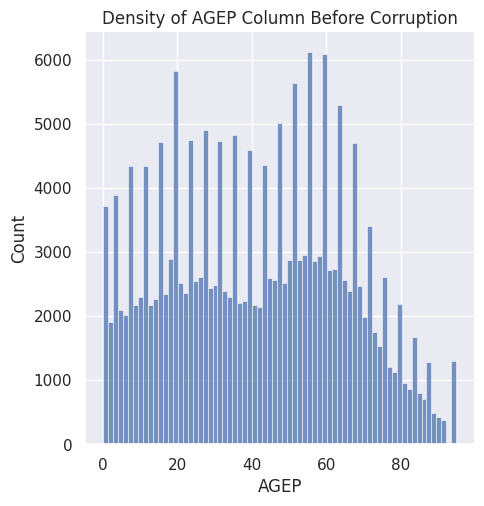

<Figure size 1200x1200 with 0 Axes>

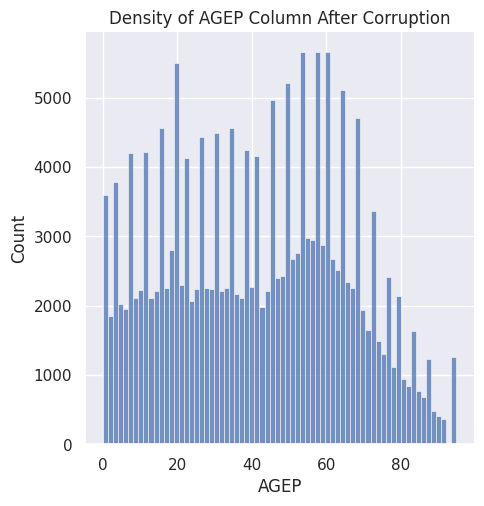

Plot AGEP column Split by Race [Before Corruption]


In [86]:
null_scenario_analysis(X_data, corrupted_data_AGEP, target_col, condition_col, special_values)

### NATIVITY. When RELP is in (11,12,15)

In [87]:
special_values = (11, 12, 15)
condition_col = 'RELP'
target_col = 'NATIVITY'
fraction = .9
corrupted_data_NATIVITY = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for NATIVITY column: 5541
Count of all records in NATIVITY column: 196104
Count of records in RELP column in the defined condition: 6157




<Figure size 1200x1200 with 0 Axes>

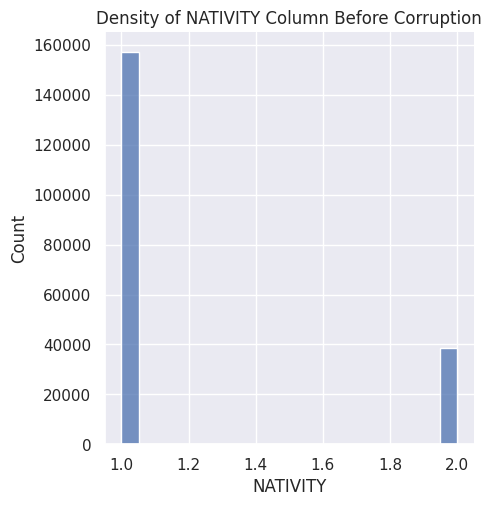

<Figure size 1200x1200 with 0 Axes>

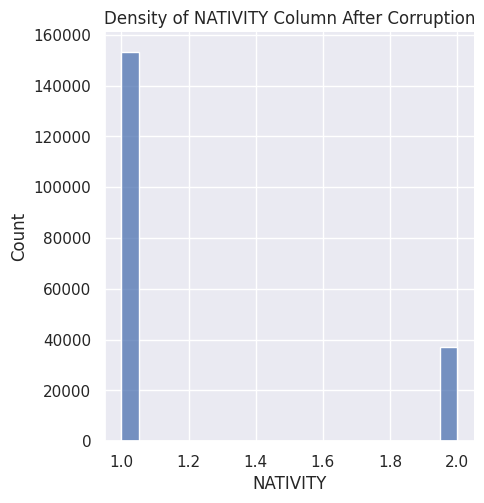

Plot AGEP column Split by Race [Before Corruption]


In [88]:
null_scenario_analysis(X_data, corrupted_data_NATIVITY, target_col, condition_col, special_values)

## Avoided

Count of nulls for DIS column: 24407
Count of all records in DIS column: 196104
Count of records in DIS column in the defined condition: 27119




<Figure size 1200x1200 with 0 Axes>

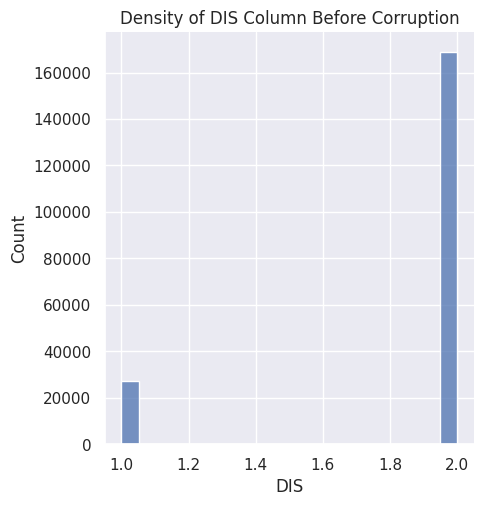

<Figure size 1200x1200 with 0 Axes>

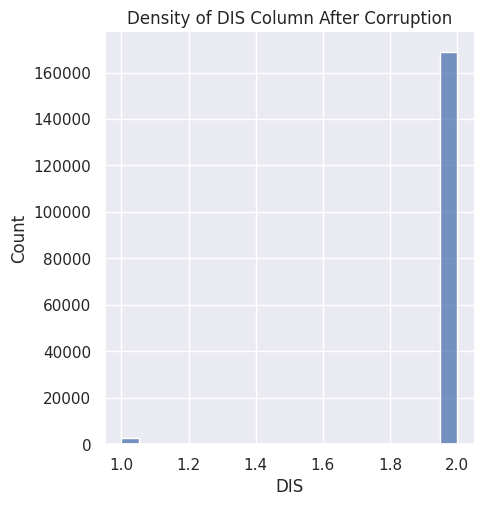

Plot AGEP column Split by Race [Before Corruption]


Count of nulls for DEAR column: 5966
Count of all records in DEAR column: 196104
Count of records in DEAR column in the defined condition: 6629




<Figure size 1200x1200 with 0 Axes>

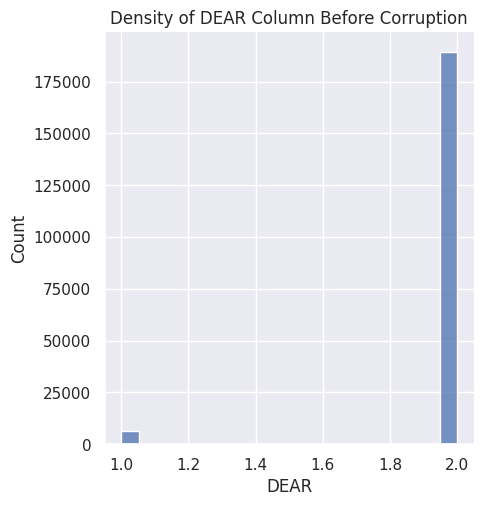

<Figure size 1200x1200 with 0 Axes>

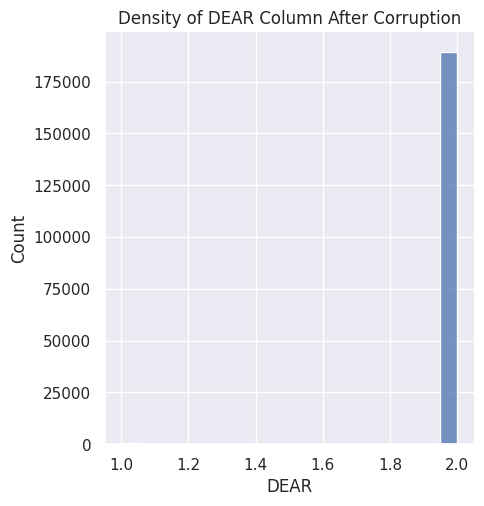

Plot AGEP column Split by Race [Before Corruption]


Count of nulls for DEYE column: 4188
Count of all records in DEYE column: 196104
Count of records in DEYE column in the defined condition: 4654




<Figure size 1200x1200 with 0 Axes>

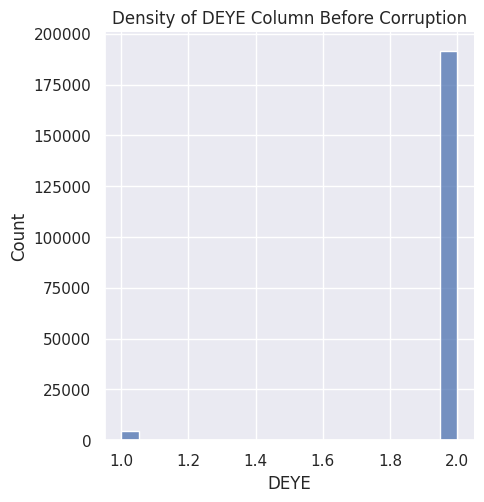

<Figure size 1200x1200 with 0 Axes>

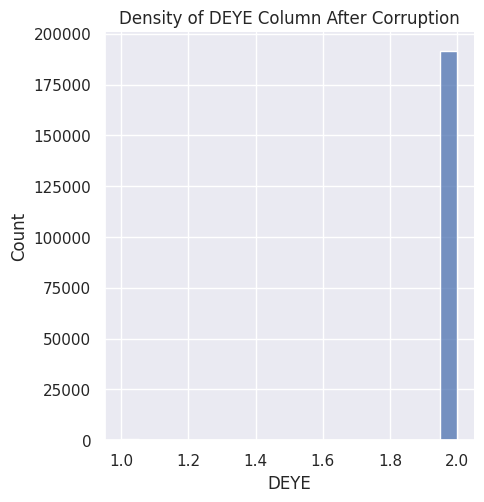

Plot AGEP column Split by Race [Before Corruption]


Count of nulls for DREM column: 9434
Count of all records in DREM column: 196104
Count of records in DREM column in the defined condition: 10483




<Figure size 1200x1200 with 0 Axes>

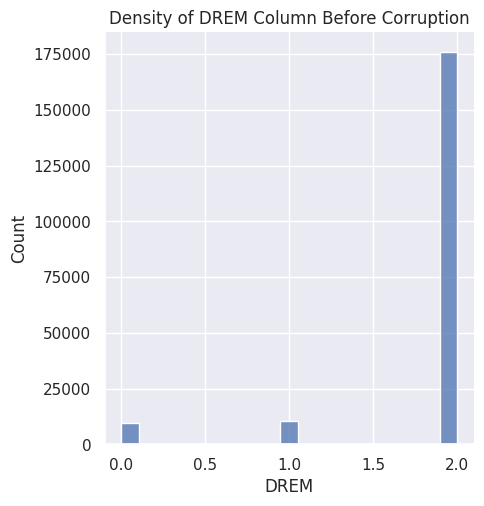

<Figure size 1200x1200 with 0 Axes>

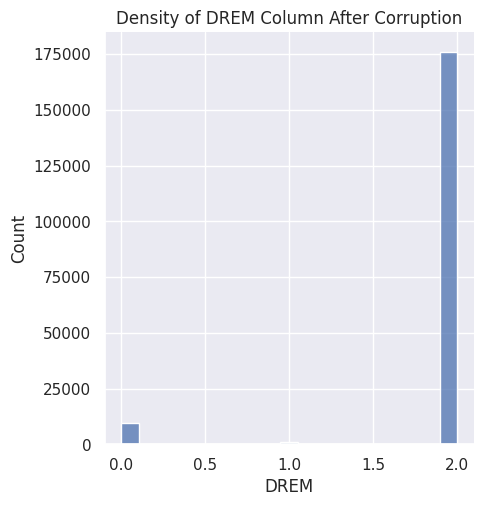

Plot AGEP column Split by Race [Before Corruption]


In [89]:
condition_cols = ['DIS', 'DEAR', 'DEYE', 'DREM']
target_cols = ['DIS', 'DEAR', 'DEYE', 'DREM']
special_values = [True]
fraction = .9


for target_col, condition_col in zip(target_cols, condition_cols):
    corrupted_data = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)
    null_scenario_analysis(X_data, corrupted_data, target_col, condition_col, special_values)

As was expected, since low percentage of people with disabilities, the distributions didn't change much.

## Special

SEX, when sex is male or ratio of male and female can be 60:40, assuming person is non-binary, impute as NULL (special) 

In [90]:
special_values = [1]
condition_col = 'SEX'
target_col = 'SEX'
fraction = .11
corrupted_data_MAR = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for SEX column: 0
Count of all records in SEX column: 196104
Count of records in SEX column in the defined condition: 94471




<Figure size 1200x1200 with 0 Axes>

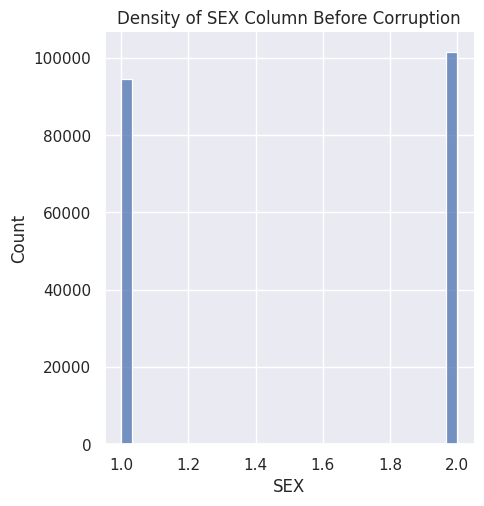

<Figure size 1200x1200 with 0 Axes>

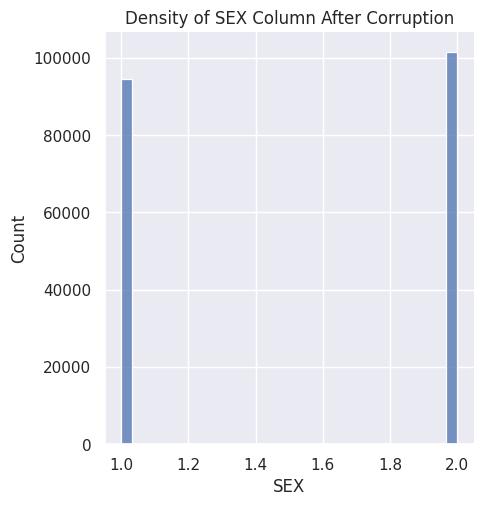

Plot AGEP column Split by Race [Before Corruption]


In [91]:
null_scenario_analysis(X_data, corrupted_data_NATIVITY, target_col, condition_col, special_values)

RAC1P, when RAC1P is 9, assuming people are biracial, impute as NULL (special)

In [92]:
special_values = [9]
condition_col = 'RAC1P'
target_col = 'RAC1P'
fraction = .9
corrupted_data_MAR = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for RAC1P column: 0
Count of all records in RAC1P column: 196104
Count of records in RAC1P column in the defined condition: 5435




<Figure size 1200x1200 with 0 Axes>

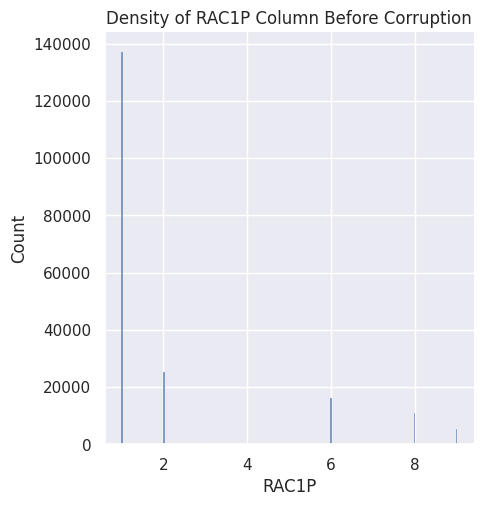

<Figure size 1200x1200 with 0 Axes>

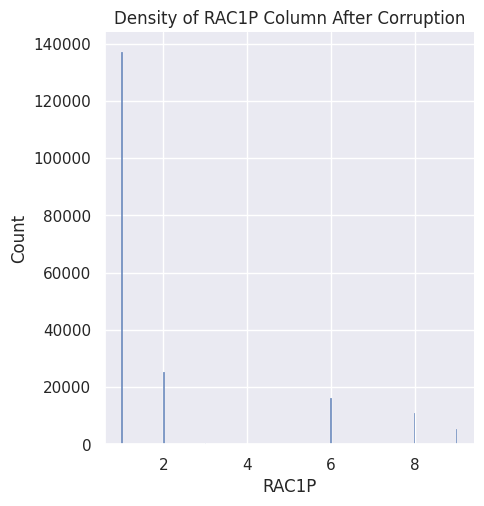

Plot AGEP column Split by Race [Before Corruption]


In [93]:
null_scenario_analysis(X_data, corrupted_data_NATIVITY, target_col, condition_col, special_values)